In [8]:
from python.import_script import import_packages

In [9]:
import_packages()
import ROOT
import uproot
import numpy as np
import array as array
import math
import matplotlib.pyplot as plt
import pickle as pkl
import hist

#import statistics as st
ROOT.gStyle.SetOptStat(000000)

mplhep not found. Installing...
hist not found. Installing...


In [10]:
from python import binning

In [11]:
with open("pkl_files/old_bins/gen_with_asym_pt_for_purity.pkl", "rb") as f:
    output = pkl.load( f )

with open("pkl_files/old_bins/june13/qjetmass_zjets_reco.pkl", "rb") as f:
    output_data = pkl.load( f )

FileNotFoundError: [Errno 2] No such file or directory: 'pkl_files/old_bins/gen_with_asym_pt_for_purity.pkl'

In [12]:
ptreco_center = output['response_matrix_g'].axes[1].centers
ptreco_width = output['response_matrix_g'].axes[1].widths
ptreco_edge = output['response_matrix_g'].axes[1].edges

ptgen_center = output['response_matrix_g'].axes[3].centers
ptgen_width = output['response_matrix_g'].axes[3].widths
ptgen_edge = output['response_matrix_g'].axes[3].edges
mreco_center = output['response_matrix_g'].axes[2].centers
mreco_edge = output['response_matrix_g'].axes[2].edges
mgen_center = output['response_matrix_g'].axes[4].centers

mreco_width = output['response_matrix_g'].axes[2].widths
mgen_width = output['response_matrix_g'].axes[4].widths
mgen_edge = output['response_matrix_g'].axes[4].edges


NameError: name 'output' is not defined

In [23]:
bins = binning.binning(mbinsGen =mgen_edge,mbinsDet = mreco_edge, ptbinsGen = ptgen_edge, ptbinsDet = ptreco_edge )

mbinsGen  =  bins.mbinsGen
mbinsDet  =  bins.mbinsDet
ptbinsGen =  bins.ptbinsGen
ptbinsDet =  bins.ptbinsDet


nmbinsGen  =  bins.nmbinsGen
nmbinsDet  =  bins.nmbinsDet
nptbinsGen =  bins.nptbinsGen
nptbinsDet =  bins.nptbinsDet

In [24]:
M = ROOT.TUnfoldBinning.CreateHistogramOfMigrations(bins.genDist,bins.detDist,"M")


h = bins.detDist.CreateHistogram("h")

hup = bins.detDist.CreateHistogram("hup")
hdn = bins.detDist.CreateHistogram("hdn")



htrue = bins.genDist.CreateHistogram("htrue")
htruef = bins.genDist.CreateHistogram("htruef")

Warning in <TROOT::Append>: Replacing existing TH1: M (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hup (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdn (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htrue (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htruef (Potential memory leak).


In [96]:
response_hist = output['response_matrix_g'][{'systematic':'nominal'}].project('ptreco', 'mreco', 'ptgen', 'mgen')

In [97]:
response_hist_pt = response_hist.project('ptreco', 'ptgen')

In [98]:
purity = np.diag(response_hist_pt.values()) / np.sum(response_hist_pt.values(), axis=1)
stability = np.diag(response_hist_pt.values()) / np.sum(response_hist_pt.values(), axis=0)

/tmp/ipykernel_145/3001553914.py:1: RuntimeWarning: invalid value encountered in divide
  purity = np.diag(response_hist_pt.values()) / np.sum(response_hist_pt.values(), axis=1)


In [99]:
import pylab as plt


(160.0, 800.0)

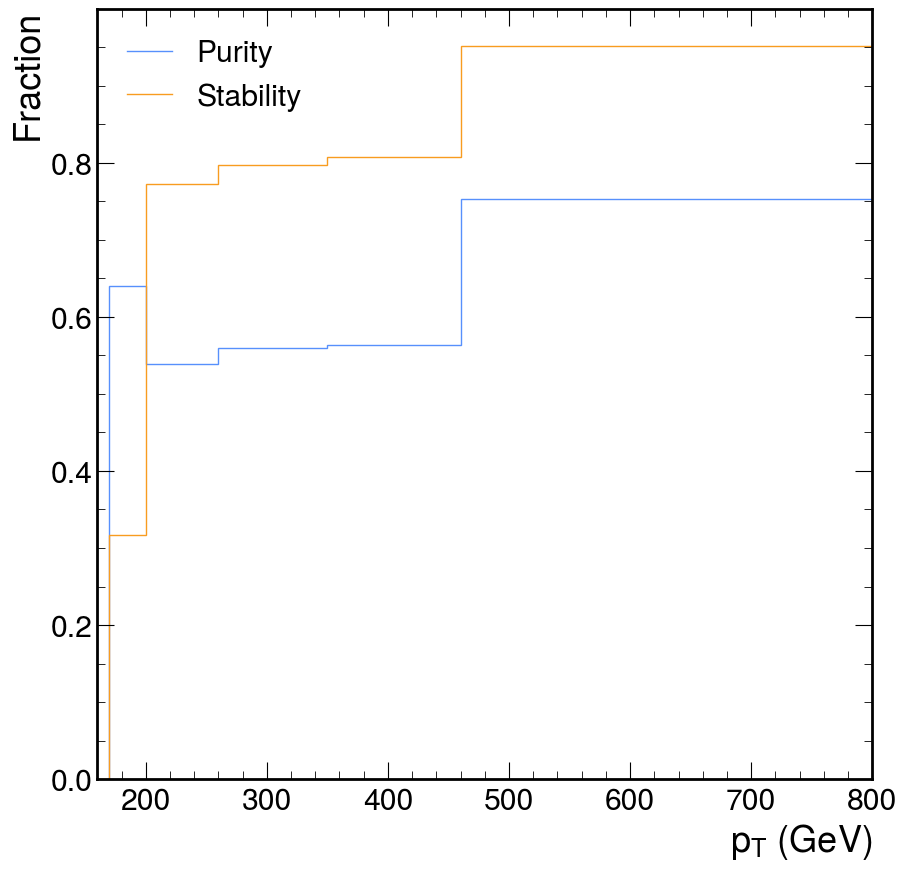

In [100]:
import mplhep as hep
hep.style.use('CMS')
hep.style.use("firamath")
plt.stairs( purity, ptreco_edge, label = 'Purity')
plt.stairs( stability, ptreco_edge, label = 'Stability')
plt.xlabel(r'$p_{T}$ (GeV)')
plt.ylabel('Fraction')
plt.legend()
plt.xlim(160,800)

In [95]:
mgen_edge = response_hist[2, hist.rebin(2),2,hist.rebin(2)].axes[0].edges

/tmp/ipykernel_145/3038849812.py:2: RuntimeWarning: invalid value encountered in divide
  purity = np.diag(response_hist[i, hist.rebin(2),i,hist.rebin(2)].values())/np.sum(response_hist[i, hist.rebin(2),i,hist.rebin(2)].values(), axis = 1)
/tmp/ipykernel_145/3038849812.py:3: RuntimeWarning: invalid value encountered in divide
  stability = np.diag(response_hist[i, hist.rebin(2),i,hist.rebin(2)].values())/np.sum(response_hist[i, hist.rebin(2),i,hist.rebin(2)].values(), axis = 0)


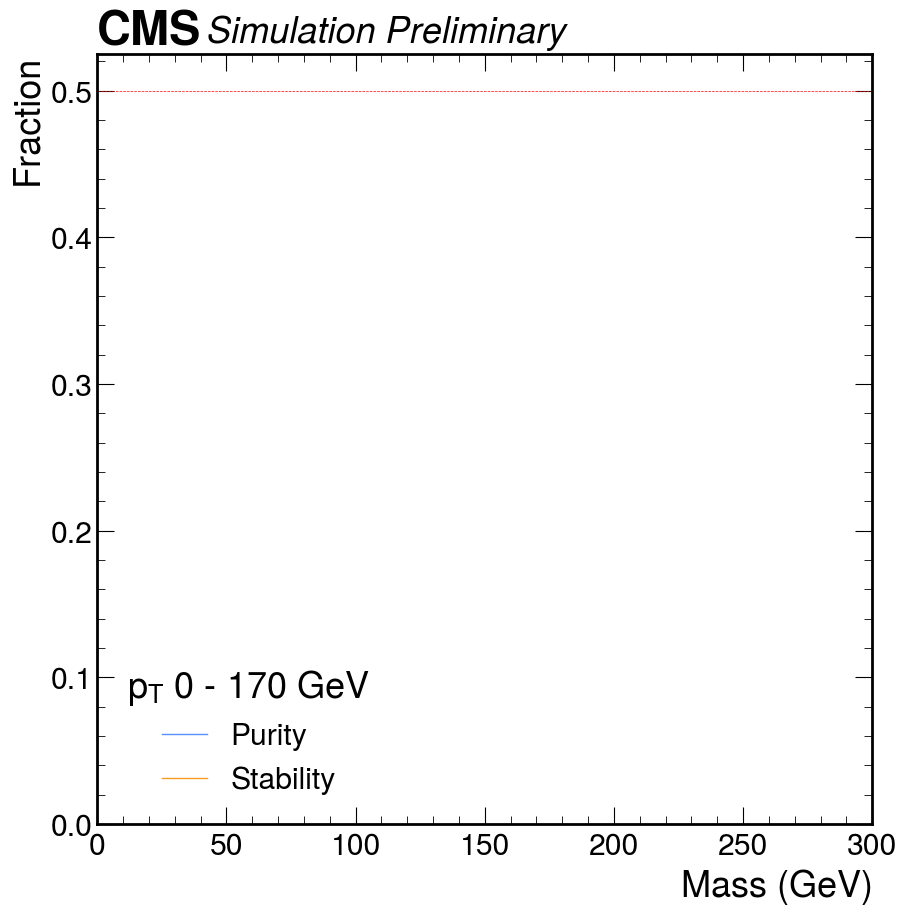

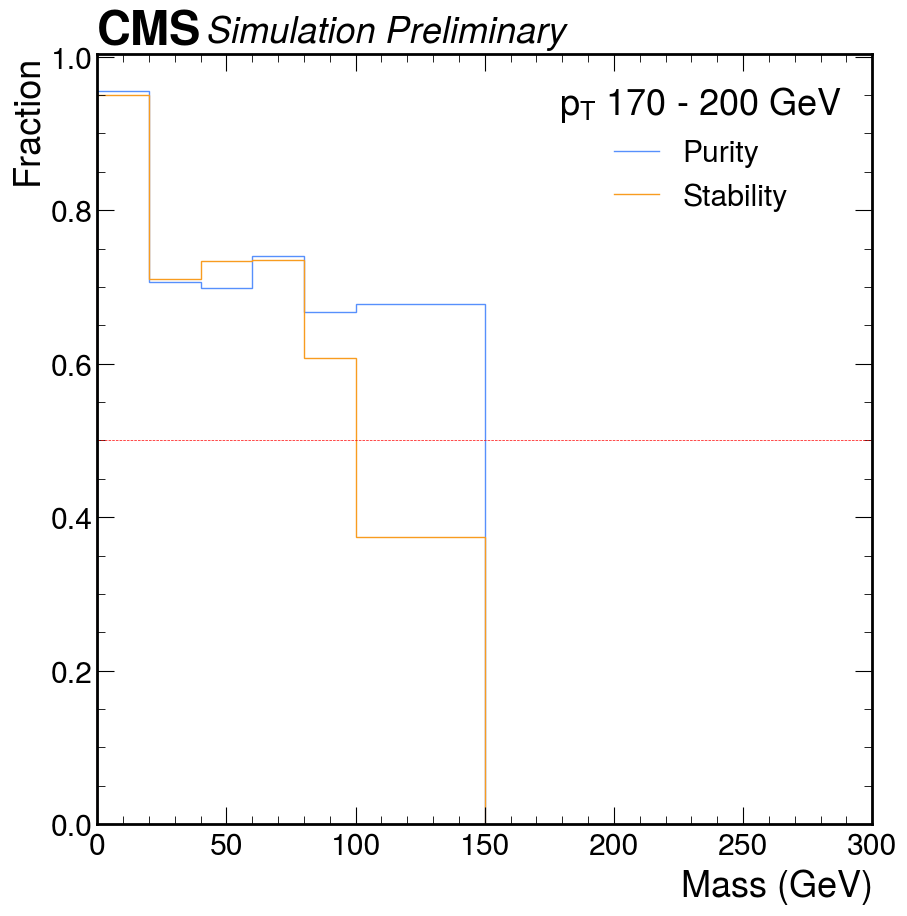

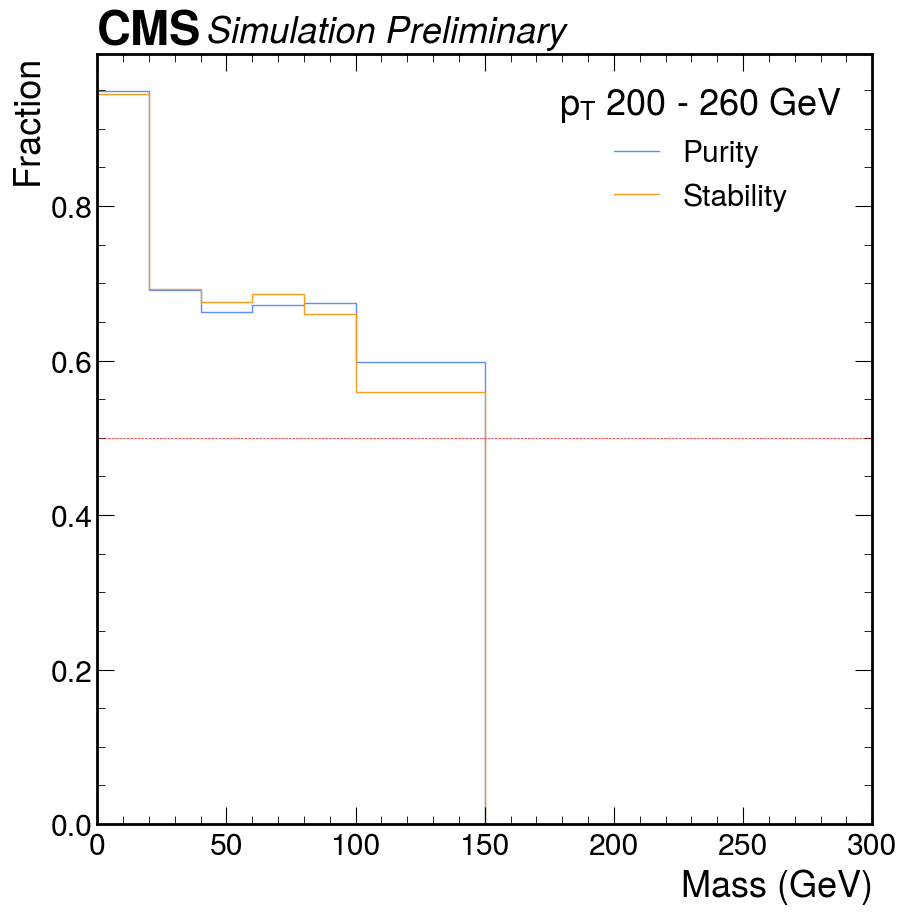

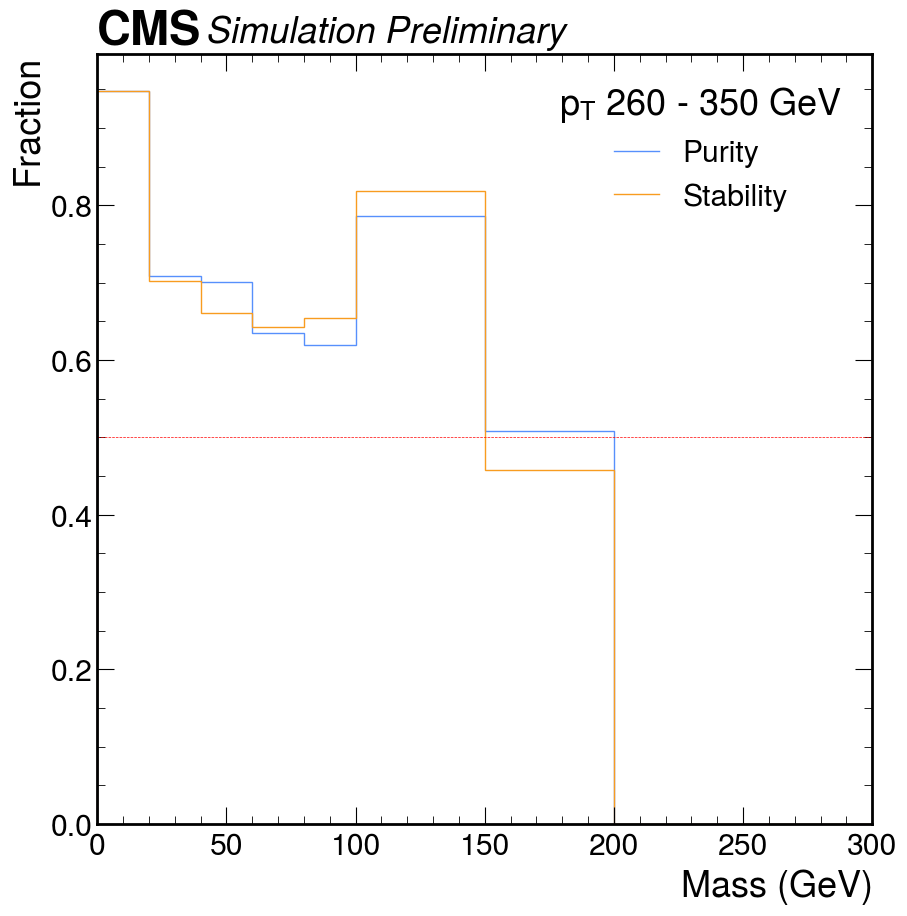

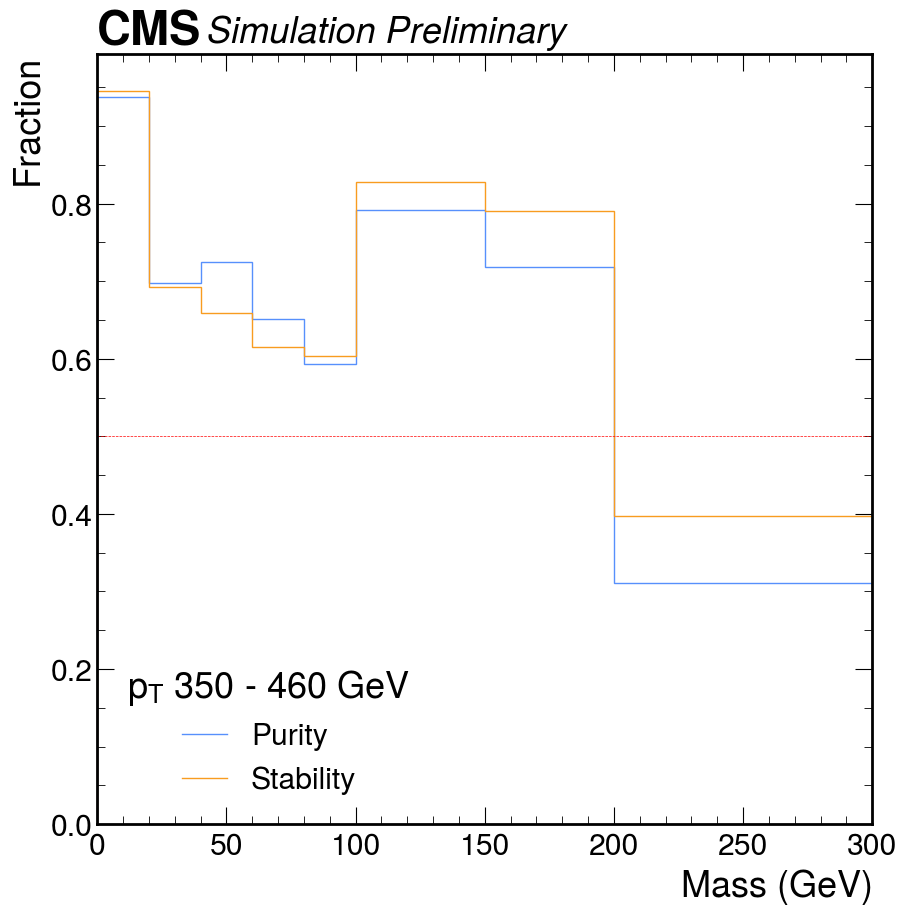

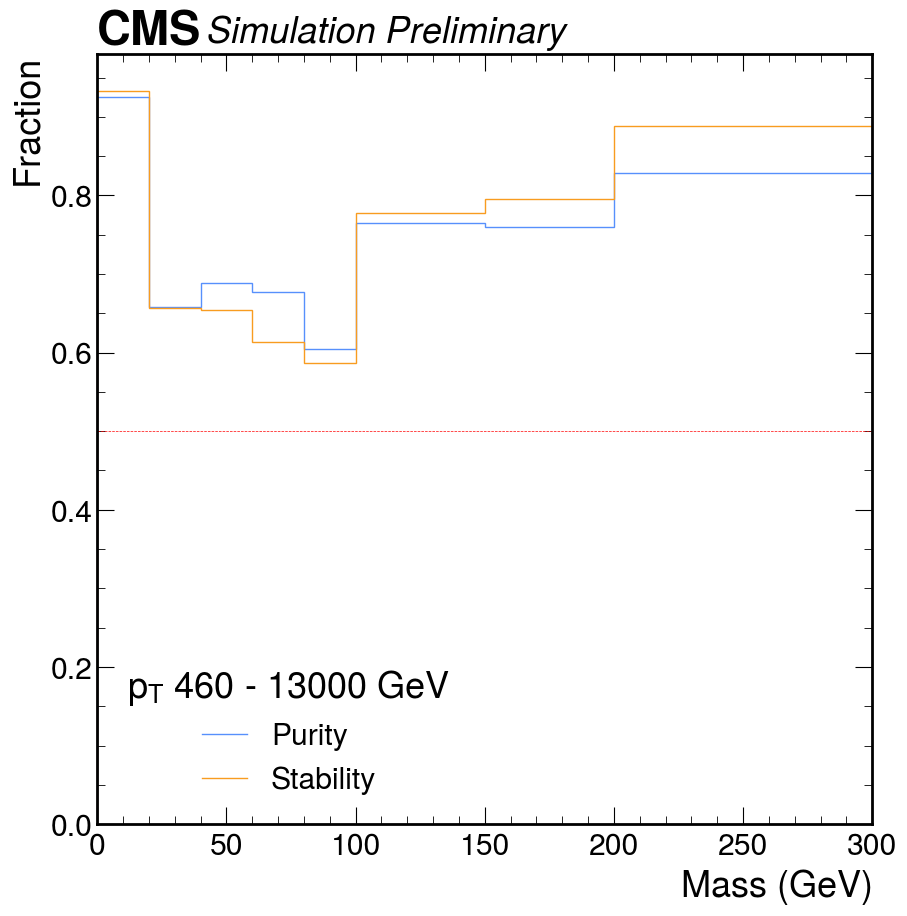

In [89]:
for i in range(6):
    purity = np.diag(response_hist[i, hist.rebin(2),i,hist.rebin(2)].values())/np.sum(response_hist[i, hist.rebin(2),i,hist.rebin(2)].values(), axis = 1)
    stability = np.diag(response_hist[i, hist.rebin(2),i,hist.rebin(2)].values())/np.sum(response_hist[i, hist.rebin(2),i,hist.rebin(2)].values(), axis = 0)
    hep.style.use('CMS')
    plt.stairs( purity, mgen_edge, label = 'Purity')
    plt.stairs( stability, mgen_edge, label = 'Stability')
    plt.axline(xy1=(0,0.5), slope = 0, color='r', linestyle='--', lw = 0.5)
    plt.xlabel(r'$Mass$ (GeV)')
    plt.ylabel('Fraction')
    
    s = r"$p_T$ {} - {} GeV".format(str(ptreco_edge[i])[:-2], str(ptreco_edge[i+1])[:-2])
    plt.legend(title = s)
    #plt.text(210, 0.75, s, fontsize = 20)
    plt.xlim(0,300)
    hep.cms.text('Simulation Preliminary')
    plt.show()

In [47]:
?plt.text

Signature: plt.text(x, y, s, fontdict=None, **kwargs)
Docstring:
Add text to the Axes.

Add the text *s* to the Axes at location *x*, *y* in data coordinates.

Parameters
----------
x, y : float
    The position to place the text. By default, this is in data
    coordinates. The coordinate system can be changed using the
    *transform* parameter.

s : str
    The text.

fontdict : dict, default: None
    A dictionary to override the default text properties. If fontdict
    is None, the defaults are determined by `.rcParams`.

Returns
-------
`.Text`
    The created `.Text` instance.

Other Parameters
----------------
**kwargs : `~matplotlib.text.Text` properties.
    Other miscellaneous text parameters.

    Properties:
    agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
    alpha: scalar or None
    animated: bool
    backgroundcolor: color
    bbox: dict with pr